
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Refresher Course on Matrix Analysis and Optimization</h1><h2>Part II: Numerical Optimization</h2></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a> <a href="https://ljk.imag.fr/membres/Jerome.Malick/" style="font-size: 16px; font-weight: bold">Jerome Malick</a> </td>
</tr>
</table>

# 1- the Gradient Method 



We consider two $\mathbb{R}^2 \to \mathbb{R}$ convex functions with the same global minimizer $(3,1)$ but quite different *shapes* and see how this impacts the performance of gradient-based algorithms. The considered functions $f$ and $g$ and their 3D are:

<table>
<tr>
<th>\begin{array}{rrcll}
f: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & 4 (x_1-3)^2 + 2(x_2-1)^2
\end{array}</th>
<th> \begin{array}{rrcll}
g: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & \log( 1 + \exp(4 (x_1-3)^2 ) + \exp( 2(x_2-1)^2 ) ) - \log(3) .
\end{array} </th>
</tr>
<td> <img src="img/simple.png" alt="f" />  </td>
<td> <img src="img/harder.png" alt="f" /> </td>
</tr>
</table>



In numerical optimization, it is customary to define *oracles* for the functions. These are functions that take a point of the ambiant space as an input and return the value of the function at this point (or its gradient, Hessian, etc.) 

In [1]:
# Oracle for function f
def f(x):
    """
    Function f
    """
    x1 = x[0]
    x2 = x[1]
    return 4*(x1-3)**2+2*(x2-1)**2

f_plot_param  = {'x1_min' : -0.5, 'x1_max' : 5.5,
                 'x2_min' : -0.5, 'x2_max' : 5.5,
                 'nb_points' : 200,
                 'v_min' : 0, 'v_max' : 80, 'levels' : [0.5,1,2,5,10,15],
                 'title' : 'f: a simple function' }


Plotting the level sets of the functions can be useful in 2D.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

npoints = 200
xmin = -0.5
xmax = 5.5
ymin = -0.5
ymax = 5.5

In [3]:
X,Y = np.meshgrid(np.linspace(xmin,xmax,npoints),np.linspace(ymin,ymax,npoints))

Points = [  np.array([x,y]) for (x,y) in zip(X.ravel(), Y.ravel())]

Z = np.array([ f(p) for p in Points ]).reshape(X.shape)

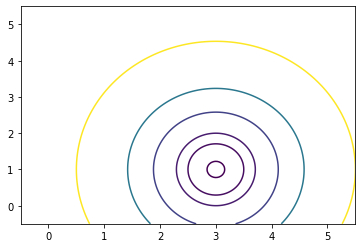

In [4]:
plt.contour(X,Y,Z,levels=[0.1,1,2,5,10,25])

> **Question a:** Construct a function `g` that will be the oracle for the second function
> \begin{array}{rrcll}
g: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & \log( 1 + \exp(4 (x_1-3)^2 ) + \exp( 2(x_2-1)^2 ) ) - \log(3) .
\end{array}

> **Question b:** Create a function `f_grad` that returns $\nabla f(x)$ (as a Numpy array) from an input vector $x$.
> Do the same for function $g$

> **Question c:** Implement a constant stepsize gradient method `gradient_algorithm(f,f_grad,x0,step,PREC,ITE_MAX)` that takes:
> * `f` and `f_grad`: respectively functions and gradient oracles
> * `x0`: a starting point
> * `step`: a (real) stepsize
> * `PREC` and `ITE_MAX`: two stopping criteria for i) sought precision (in gradient norm); and ii) maximum number of iterations;
>
> and returns a tuple with `x` the final point and `x_tab` the matrix of all vectors stacked vertically

> **Question d:** Test your gradient descent function on $f$ and $g$:
> 1. Verify that the final point is close to the sought minimizer $(3,1)$ 
> * Observe the behavior of the iterates (you can plot them on top of the contour plot)
> * Change the stepsize and give the values for which the algorithm i) diverges; and ii) oscillates. Compare with theoretical limits by computing the Lipschitz constant of the gradients

# 2- Application to Regression 


We now get back to the problem of predicting the final grade of a student from various features treated in the Matrix part of the course.

We remind that mathematically, from the $m_{learn}  \times (n+1)$  *learning matrix* $A_{learn}$
($m_{learn} = 300$, $n=27$)  comprising of the features values of each training student in line, and the vector of the values of the target features $b_{learn}$;  we seek a size-$(n+1)$ *regression vector* that minimizes the squared error between  $A_{learn} x$ and $b_{learn}$. This problem boils down to the following least square problem:
$$ \min_{x\in\mathbb{R}^{n+1}} s(x) =  \frac{1}{2} \|  A_{learn} x - b_{learn} \|_2^2 . $$

In [5]:
import numpy as np

# File reading
dat_file = np.load('data/student.npz')
A_learn = dat_file['A_learn']
b_learn = dat_file['b_learn']
A_test = dat_file['A_test']
b_test = dat_file['b_test']

m = 395 # number of read examples (total:395)
n = 27 # features
m_learn = 300

> **Question a:** Construct the oracles for function $s$ and its gradient as in the previous section

> **Question b:** Compute the Lipschitz constant of the gradient of $s$. Find a solution to the minimization of $s$ using your gradient algorithm. Compare with Numpy's Least Square routine.

> **Question c:** Generate random Gaussian matrix/vector couples $A,b$ with different sizes, change the *shape* of $A$ from *tall* (nb. of rows >> nb. of cols.) to *fat* (nb. of rows << nb. of cols.). Compare the execution time of constant stepsize gradient with fixed precision for the different couples.

# 3- Beyond constant stepsizes 


The *Rosenbrock* function $r$ writes 
<table>
<tr>
<th>\begin{array}{rrcll}
r: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  &  (1-x_1)^2 + 100(x_2-x_1^2)^2 .
\end{array}</th>
</tr>
<td> <img src="img/rosenbrock.png" alt="f" />  </td>
</tr>
</table>

This function has a global minimum at $(1,1)$ with value $0$.

> **Question a:** Construct function and gradient oracles for $r$. 

> **Question b:** Try to minimize $r$ using your constant stepsize gradient function. Can you find a stepsize for which the algorithm converges?

The observed problem is typical of poorly conditionned functions. At the beggining, gradients are large and so a small stepsize has to be employed but near the optimal value, the gradients are very small and thus the progress is very slow. 

> **Question c:** Try to devise a gradient method where you change the stepsize during the algorithms to mend this problem.

A systematic approch to stepsize tuning is the use of a [line-search](https://en.wikipedia.org/wiki/Line_search) method. 

> **Question d:** Implement a gradient algorithm with [Armijo-Wolfe](https://en.wikipedia.org/wiki/Wolfe_conditions) linesearch using Scipy's [line_search](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.line_search.html) routine.
>
> *Warning:* Since you are doing gradient descent, your *search direction* is the *opposite* of the gradient.

# 4- Application to Classification


Binary classification is another popular problem in machine learning. Instead of predicting a numerical value, the goal is now to classify the student into two classes: $+1$ -- *pass* i.e. final grade $\geq 10$; and $-1$ -- *fail*. 

To this purpose, we create a class vector $c_{learn}$  from the observation vector $b_{learn}$ by simply setting $c_{learn}(i) = +1 $ if  $b_{learn}(i)\geq10$ and $-1$ otherwise. 


Then, the most common approach is to minimize the logistic loss regularized by a squared norm:
\begin{equation}
\min_{x\in\mathbb{R}^{n+1}}  \ell(x) = \sum_{i=1}^{m_{learn} } \log\left( 1 + \exp\left( -c_{learn}(i) a_i^{\mathrm{T}}  x   \right) \right)  + \frac{1}{m}\|x\|^2
\end{equation}
where $a^\mathrm{T}_i$ is the $i$-th row of $A_{learn}$.

Finally, from a solution $x^\star$ of this problem, one can classify a new example, represented by its feature vector $a$, as such: the quantity $p(a) = \frac{1}{1+\exp(- a^\mathrm{T} x^\star)}$ estimates the probability of belonging to class $1$; thus, one can decide class $+1$ if for instance $ p(a) \geq 0.5$; otherwise, decide class $-1$.

In [6]:
c_learn = np.sign(b_learn-(10-1e-15))
c_learn

array([-1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1.,
        1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,
       -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
        1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,
        1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,  1., -1

> **Question a:** Compute the gradient of $q(t)  = \log(1+\exp(t))$. Is the function is convex? Deduce that $\ell$ is convex and compute its gradient. 

As you can see if you plot it, this kind of function has steep slopes but also very flat valleys. Hence, constant stepsize might not perform well.

> **Question b:** Construct the suitable function and gradient simulators in order to use your gradient descent function with Armijo-Wolfe linesearch.

> **Question c:** From a final point of the optimization algorithm above, generate a decision vector corresponding to the testing set $A_{test}$. Evaluate the classification error.